### **1️⃣ DATA LOADING & PREPROCESSING**

In [74]:
import numpy as np
import pandas as pd
import os
import cv2
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
print("ok")

ok


# The Dataset
## There are 0 to 9 ( ten folders each folder represents a Different Test Subject,)
## These ten folders each have 10 folders that features and each feature has 200 images
### So that means each feature has 200 x 10 = 2000 images. 
### There are 2000 images each Subject
### There are 2000 x 10 = 20,000 images in total.

In [75]:
# Define dataset path "E:\Dataset\leapGestRecog\00" "C:\Users\22108165\Documents\Downloads\archive\leapGestRecog"
folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]
print(folders_names)
files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

['E:\\Dataset\\leapGestRecog\\0', 'E:\\Dataset\\leapGestRecog\\1', 'E:\\Dataset\\leapGestRecog\\2', 'E:\\Dataset\\leapGestRecog\\3', 'E:\\Dataset\\leapGestRecog\\4', 'E:\\Dataset\\leapGestRecog\\5', 'E:\\Dataset\\leapGestRecog\\6', 'E:\\Dataset\\leapGestRecog\\7', 'E:\\Dataset\\leapGestRecog\\8', 'E:\\Dataset\\leapGestRecog\\9']


<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Abdullah Bilal\AppData\Local\Temp\ipykernel_20076\2590077573.py:2: SyntaxWarning: invalid escape sequence '\{'
  folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]
C:\Users\Abdullah Bilal\AppData\Local\Temp\ipykernel_20076\2590077573.py:2: SyntaxWarning: invalid escape sequence '\D'
  folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]


In [76]:
# Load dataset with preprocessing
def create_training_data():
    training_data = []
    for folder in folders_names:
          # ✅ Extract class number (Encode gesture label numerically)
        for file in files_names:
            Class_num = int(file[1])
            path = os.path.join(folder, file)
            print(path)
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # ✅ Convert to grayscale
                img_array = cv2.resize(img_array, (64, 64))  # ✅ Resize to (64,64)
                img_array = img_array.flatten()  # ✅ Flatten the image
                img_array = img_array / 255.0  # ✅ Normalize pixel values
                training_data.append([img_array, Class_num])
                
    return training_data

training_data = create_training_data()



E:\Dataset\leapGestRecog\0\01_palm


100%|██████████| 200/200 [00:00<00:00, 300.16it/s]


E:\Dataset\leapGestRecog\0\02_l


100%|██████████| 200/200 [00:00<00:00, 336.10it/s]


E:\Dataset\leapGestRecog\0\03_fist


100%|██████████| 200/200 [00:00<00:00, 257.71it/s]


E:\Dataset\leapGestRecog\0\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 275.59it/s]


E:\Dataset\leapGestRecog\0\05_thumb


100%|██████████| 200/200 [00:00<00:00, 308.20it/s]


E:\Dataset\leapGestRecog\0\06_index


100%|██████████| 200/200 [00:00<00:00, 236.28it/s]


E:\Dataset\leapGestRecog\0\07_ok


100%|██████████| 200/200 [00:00<00:00, 239.28it/s]


E:\Dataset\leapGestRecog\0\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 255.99it/s]


E:\Dataset\leapGestRecog\0\09_c


100%|██████████| 200/200 [00:00<00:00, 264.42it/s]


E:\Dataset\leapGestRecog\0\10_down


100%|██████████| 200/200 [00:00<00:00, 291.09it/s]


E:\Dataset\leapGestRecog\1\01_palm


100%|██████████| 200/200 [00:00<00:00, 315.37it/s]


E:\Dataset\leapGestRecog\1\02_l


100%|██████████| 200/200 [00:00<00:00, 318.20it/s]


E:\Dataset\leapGestRecog\1\03_fist


100%|██████████| 200/200 [00:00<00:00, 311.54it/s]


E:\Dataset\leapGestRecog\1\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 326.68it/s]


E:\Dataset\leapGestRecog\1\05_thumb


100%|██████████| 200/200 [00:00<00:00, 312.23it/s]


E:\Dataset\leapGestRecog\1\06_index


100%|██████████| 200/200 [00:00<00:00, 296.67it/s]


E:\Dataset\leapGestRecog\1\07_ok


100%|██████████| 200/200 [00:00<00:00, 336.09it/s]


E:\Dataset\leapGestRecog\1\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 329.33it/s]


E:\Dataset\leapGestRecog\1\09_c


100%|██████████| 200/200 [00:00<00:00, 317.18it/s]


E:\Dataset\leapGestRecog\1\10_down


100%|██████████| 200/200 [00:00<00:00, 322.88it/s]


E:\Dataset\leapGestRecog\2\01_palm


100%|██████████| 200/200 [00:00<00:00, 310.77it/s]


E:\Dataset\leapGestRecog\2\02_l


100%|██████████| 200/200 [00:00<00:00, 317.10it/s]


E:\Dataset\leapGestRecog\2\03_fist


100%|██████████| 200/200 [00:00<00:00, 277.45it/s]


E:\Dataset\leapGestRecog\2\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 286.64it/s]


E:\Dataset\leapGestRecog\2\05_thumb


100%|██████████| 200/200 [00:00<00:00, 313.57it/s]


E:\Dataset\leapGestRecog\2\06_index


100%|██████████| 200/200 [00:00<00:00, 321.82it/s]


E:\Dataset\leapGestRecog\2\07_ok


100%|██████████| 200/200 [00:00<00:00, 280.88it/s]


E:\Dataset\leapGestRecog\2\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 322.28it/s]


E:\Dataset\leapGestRecog\2\09_c


100%|██████████| 200/200 [00:00<00:00, 324.54it/s]


E:\Dataset\leapGestRecog\2\10_down


100%|██████████| 200/200 [00:00<00:00, 322.67it/s]


E:\Dataset\leapGestRecog\3\01_palm


100%|██████████| 200/200 [00:00<00:00, 293.56it/s]


E:\Dataset\leapGestRecog\3\02_l


100%|██████████| 200/200 [00:00<00:00, 307.49it/s]


E:\Dataset\leapGestRecog\3\03_fist


100%|██████████| 200/200 [00:00<00:00, 283.85it/s]


E:\Dataset\leapGestRecog\3\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 297.20it/s]


E:\Dataset\leapGestRecog\3\05_thumb


100%|██████████| 200/200 [00:00<00:00, 329.50it/s]


E:\Dataset\leapGestRecog\3\06_index


100%|██████████| 200/200 [00:00<00:00, 330.77it/s]


E:\Dataset\leapGestRecog\3\07_ok


100%|██████████| 200/200 [00:00<00:00, 289.55it/s]


E:\Dataset\leapGestRecog\3\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 307.16it/s]


E:\Dataset\leapGestRecog\3\09_c


100%|██████████| 200/200 [00:00<00:00, 311.10it/s]


E:\Dataset\leapGestRecog\3\10_down


100%|██████████| 200/200 [00:00<00:00, 325.66it/s]


E:\Dataset\leapGestRecog\4\01_palm


100%|██████████| 200/200 [00:00<00:00, 293.51it/s]


E:\Dataset\leapGestRecog\4\02_l


100%|██████████| 200/200 [00:00<00:00, 384.05it/s]


E:\Dataset\leapGestRecog\4\03_fist


100%|██████████| 201/201 [00:00<00:00, 297.91it/s]


E:\Dataset\leapGestRecog\4\04_fist_moved


100%|██████████| 201/201 [00:00<00:00, 285.55it/s]


E:\Dataset\leapGestRecog\4\05_thumb


100%|██████████| 200/200 [00:00<00:00, 292.07it/s]


E:\Dataset\leapGestRecog\4\06_index


100%|██████████| 200/200 [00:00<00:00, 291.24it/s]


E:\Dataset\leapGestRecog\4\07_ok


100%|██████████| 200/200 [00:00<00:00, 238.41it/s]


E:\Dataset\leapGestRecog\4\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 264.90it/s]


E:\Dataset\leapGestRecog\4\09_c


100%|██████████| 200/200 [00:00<00:00, 283.42it/s]


E:\Dataset\leapGestRecog\4\10_down


100%|██████████| 200/200 [00:00<00:00, 245.54it/s]


E:\Dataset\leapGestRecog\5\01_palm


100%|██████████| 200/200 [00:00<00:00, 275.13it/s]


E:\Dataset\leapGestRecog\5\02_l


100%|██████████| 200/200 [00:00<00:00, 277.88it/s]


E:\Dataset\leapGestRecog\5\03_fist


100%|██████████| 200/200 [00:00<00:00, 276.74it/s]


E:\Dataset\leapGestRecog\5\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 267.75it/s]


E:\Dataset\leapGestRecog\5\05_thumb


100%|██████████| 200/200 [00:00<00:00, 292.42it/s]


E:\Dataset\leapGestRecog\5\06_index


100%|██████████| 200/200 [00:00<00:00, 301.56it/s]


E:\Dataset\leapGestRecog\5\07_ok


100%|██████████| 200/200 [00:00<00:00, 296.41it/s]


E:\Dataset\leapGestRecog\5\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 320.44it/s]


E:\Dataset\leapGestRecog\5\09_c


100%|██████████| 200/200 [00:00<00:00, 315.18it/s]


E:\Dataset\leapGestRecog\5\10_down


100%|██████████| 200/200 [00:00<00:00, 305.09it/s]


E:\Dataset\leapGestRecog\6\01_palm


100%|██████████| 200/200 [00:00<00:00, 314.39it/s]


E:\Dataset\leapGestRecog\6\02_l


100%|██████████| 200/200 [00:00<00:00, 329.55it/s]


E:\Dataset\leapGestRecog\6\03_fist


100%|██████████| 200/200 [00:00<00:00, 322.41it/s]


E:\Dataset\leapGestRecog\6\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 294.07it/s]


E:\Dataset\leapGestRecog\6\05_thumb


100%|██████████| 200/200 [00:00<00:00, 309.19it/s]


E:\Dataset\leapGestRecog\6\06_index


100%|██████████| 200/200 [00:00<00:00, 317.30it/s]


E:\Dataset\leapGestRecog\6\07_ok


100%|██████████| 200/200 [00:00<00:00, 273.39it/s]


E:\Dataset\leapGestRecog\6\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 246.39it/s]


E:\Dataset\leapGestRecog\6\09_c


100%|██████████| 200/200 [00:00<00:00, 256.50it/s]


E:\Dataset\leapGestRecog\6\10_down


100%|██████████| 200/200 [00:00<00:00, 301.51it/s]


E:\Dataset\leapGestRecog\7\01_palm


100%|██████████| 200/200 [00:00<00:00, 311.88it/s]


E:\Dataset\leapGestRecog\7\02_l


100%|██████████| 200/200 [00:00<00:00, 290.79it/s]


E:\Dataset\leapGestRecog\7\03_fist


100%|██████████| 200/200 [00:00<00:00, 286.17it/s]


E:\Dataset\leapGestRecog\7\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 321.37it/s]


E:\Dataset\leapGestRecog\7\05_thumb


100%|██████████| 200/200 [00:00<00:00, 230.28it/s]


E:\Dataset\leapGestRecog\7\06_index


100%|██████████| 200/200 [00:00<00:00, 278.00it/s]


E:\Dataset\leapGestRecog\7\07_ok


100%|██████████| 200/200 [00:00<00:00, 280.68it/s]


E:\Dataset\leapGestRecog\7\08_palm_moved


100%|██████████| 200/200 [00:01<00:00, 116.68it/s]


E:\Dataset\leapGestRecog\7\09_c


100%|██████████| 200/200 [00:02<00:00, 90.33it/s] 


E:\Dataset\leapGestRecog\7\10_down


100%|██████████| 200/200 [00:00<00:00, 279.09it/s]


E:\Dataset\leapGestRecog\8\01_palm


100%|██████████| 200/200 [00:00<00:00, 297.17it/s]


E:\Dataset\leapGestRecog\8\02_l


100%|██████████| 200/200 [00:00<00:00, 343.64it/s]


E:\Dataset\leapGestRecog\8\03_fist


100%|██████████| 200/200 [00:00<00:00, 282.97it/s]


E:\Dataset\leapGestRecog\8\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 320.43it/s]


E:\Dataset\leapGestRecog\8\05_thumb


100%|██████████| 200/200 [00:00<00:00, 301.99it/s]


E:\Dataset\leapGestRecog\8\06_index


100%|██████████| 200/200 [00:00<00:00, 326.33it/s]


E:\Dataset\leapGestRecog\8\07_ok


100%|██████████| 200/200 [00:00<00:00, 216.45it/s]


E:\Dataset\leapGestRecog\8\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 261.56it/s]


E:\Dataset\leapGestRecog\8\09_c


100%|██████████| 200/200 [00:00<00:00, 262.93it/s]


E:\Dataset\leapGestRecog\8\10_down


100%|██████████| 200/200 [00:00<00:00, 292.09it/s]


E:\Dataset\leapGestRecog\9\01_palm


100%|██████████| 200/200 [00:00<00:00, 339.34it/s]


E:\Dataset\leapGestRecog\9\02_l


100%|██████████| 200/200 [00:00<00:00, 328.73it/s]


E:\Dataset\leapGestRecog\9\03_fist


100%|██████████| 200/200 [00:00<00:00, 328.36it/s]


E:\Dataset\leapGestRecog\9\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 338.60it/s]


E:\Dataset\leapGestRecog\9\05_thumb


100%|██████████| 200/200 [00:00<00:00, 324.98it/s]


E:\Dataset\leapGestRecog\9\06_index


100%|██████████| 200/200 [00:00<00:00, 287.24it/s]


E:\Dataset\leapGestRecog\9\07_ok


100%|██████████| 200/200 [00:00<00:00, 269.80it/s]


E:\Dataset\leapGestRecog\9\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 338.75it/s]


E:\Dataset\leapGestRecog\9\09_c


100%|██████████| 200/200 [00:00<00:00, 351.32it/s]


E:\Dataset\leapGestRecog\9\10_down


100%|██████████| 200/200 [00:00<00:00, 350.65it/s]


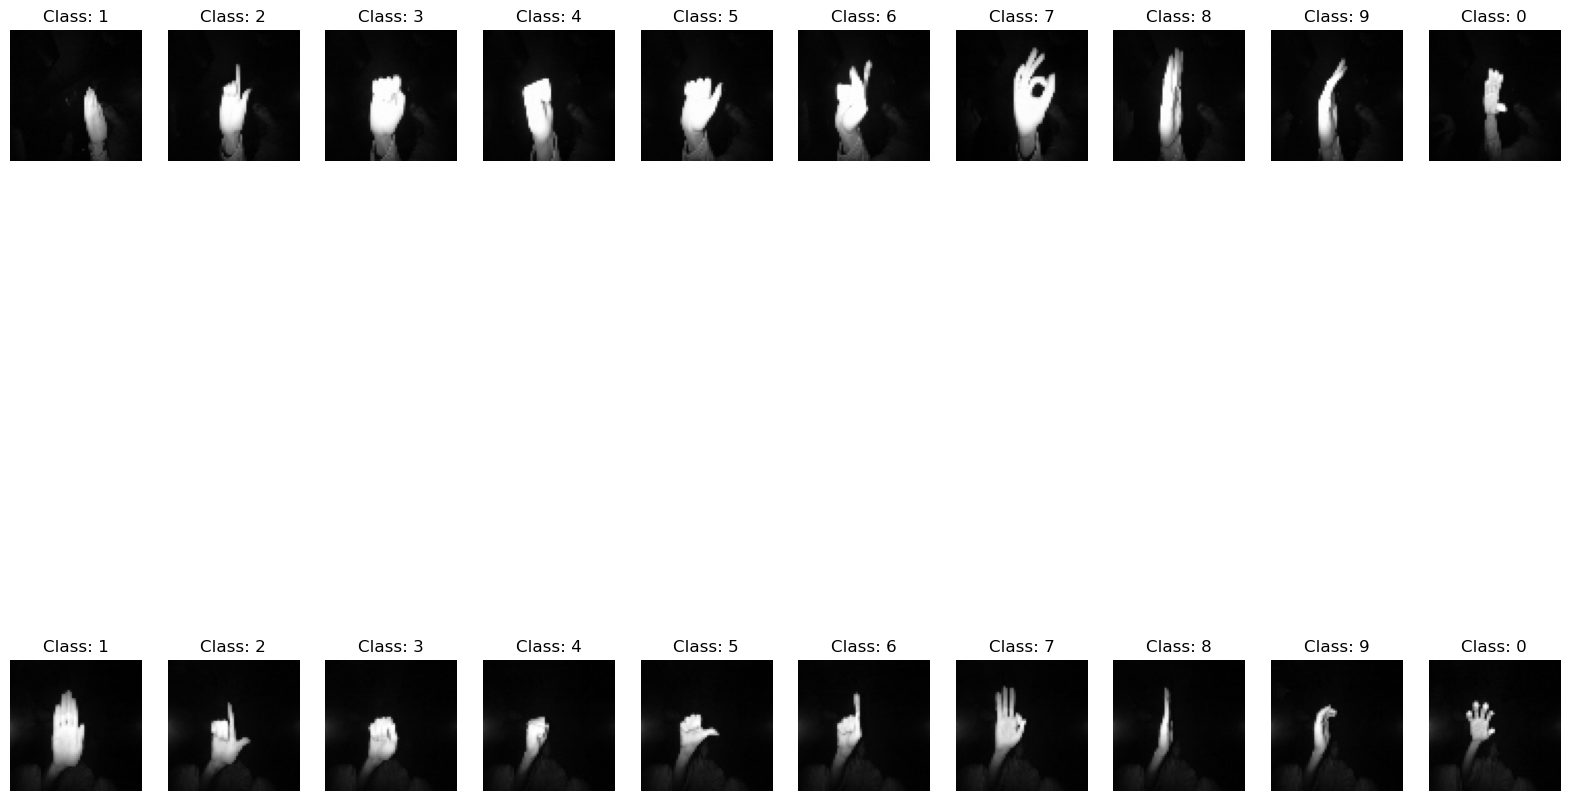

In [77]:
# Display first 10 images with labels
plt.figure(figsize=(20, 15))
for i in range(20):  # ✅ Just change this number to show more images
    plt.subplot(2, 10, i + 1)  # ✅ Adjust layout (1 row, 10 columns)
    plt.imshow(training_data[i*200][0].reshape(64, 64), cmap='gray')
    plt.title(f"Class: {training_data[i*200][1]}")
    plt.axis('off')

plt.show()


# Shuffling the data 

In [78]:
random.shuffle(training_data)

## Prepare X and y

## for X

In [79]:
X = np.array([feature for feature, label in training_data]).reshape(-1, 64, 64, 1)  # Reshape for CNN

## for y

In [80]:
y = np.array([label for _, label in training_data])  # same as [label for features, label in training_data]

### Train-test split

In [81]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {train_images.shape}, Test shape: {test_images.shape}")

Train shape: (16001, 64, 64, 1), Test shape: (4001, 64, 64, 1)


# Starting to train the CNN model 

In [82]:
model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),  # Match the actual image size
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(32),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(16),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(10, activation='softmax')
])

# Summarize the model architecture
model.summary()


e:\Anavonda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
e:\Anavonda\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,986 (1.01 MB)

 Trainable params: 264,986 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical cross-entropy for classification
              metrics=['accuracy'])


In [85]:
# Train the model
HGR = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 4.2673e-04 - val_accuracy: 0.9945 - val_loss: 0.0218
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9957 - loss: 0.0163 - val_accuracy: 0.9988 - val_loss: 0.0083
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9998 - val_loss: 0.0027
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.2643e-04 - val_accuracy: 0.9985 - val_loss: 0.0036
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 5.6719e-04 - val_accuracy: 0.9985 - val_loss: 0.0054
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0021 - val_

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0012
Test accuracy: 99.95%


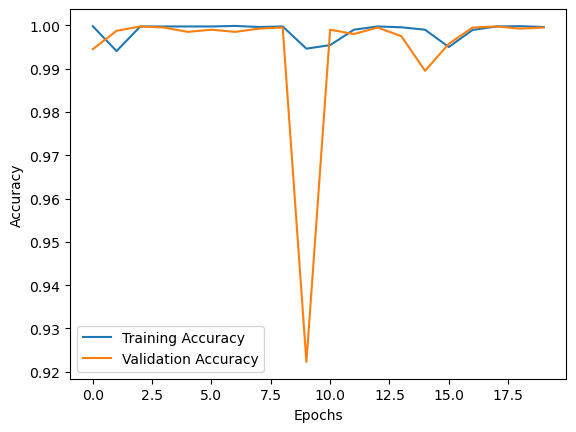

In [86]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss curves
plt.plot(HGR.history['accuracy'], label='Training Accuracy')
plt.plot(HGR.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Label: 3
Actual Label: 3


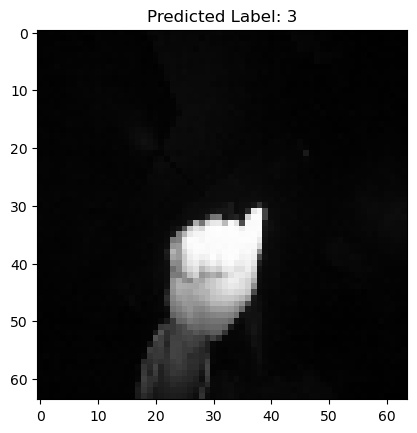

Predicted Label: 0
Actual Label: 0


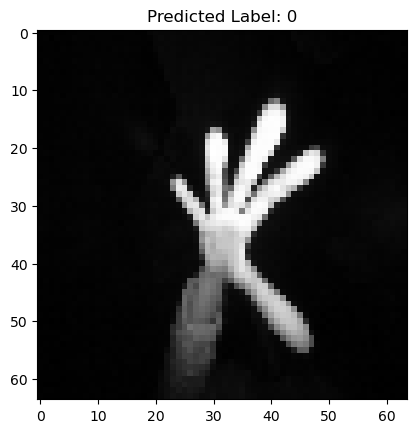

Predicted Label: 2
Actual Label: 2


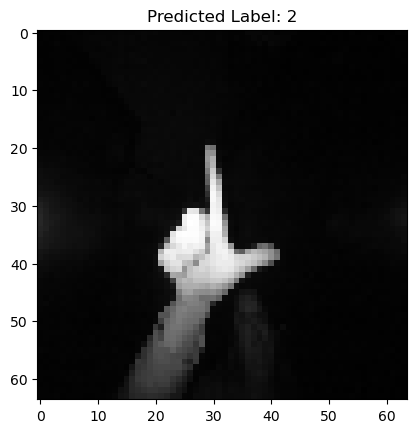

Predicted Label: 9
Actual Label: 9


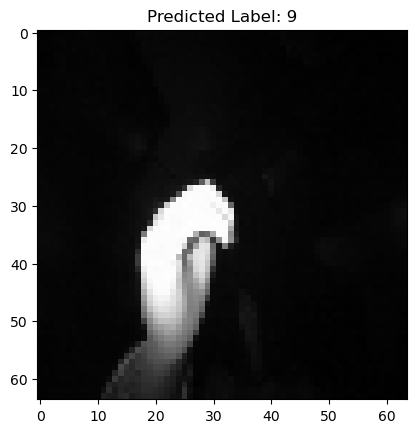

Predicted Label: 0
Actual Label: 0


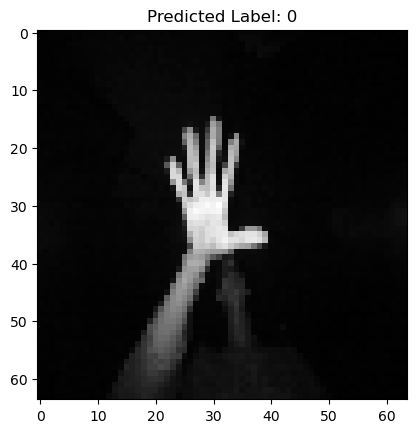

Predicted Label: 0
Actual Label: 0


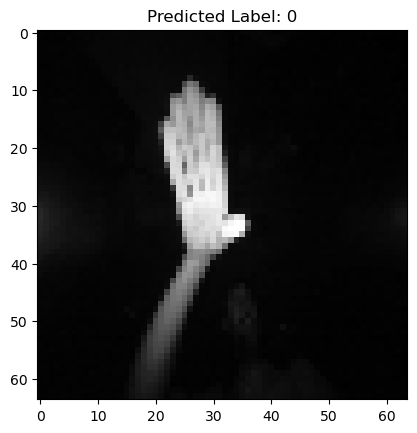

Predicted Label: 7
Actual Label: 7


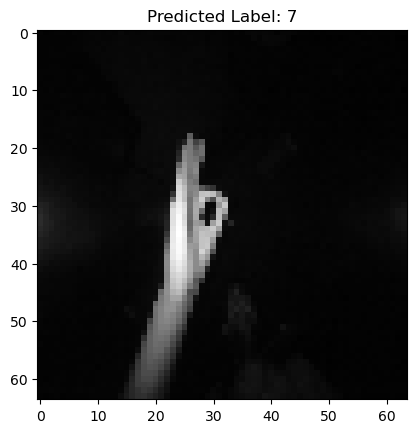

Predicted Label: 5
Actual Label: 5


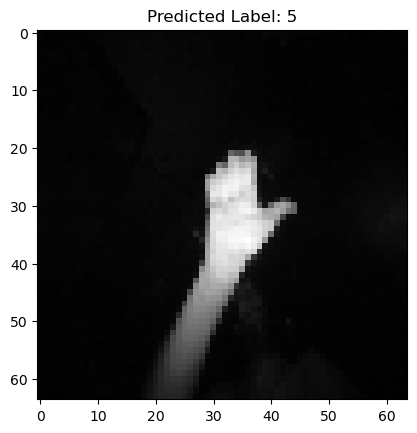

Predicted Label: 4
Actual Label: 4


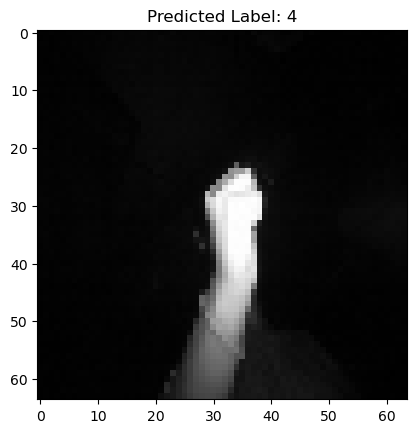

Predicted Label: 4
Actual Label: 4


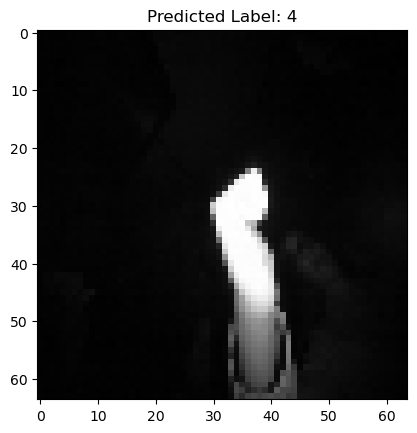

Predicted Label: 4
Actual Label: 4


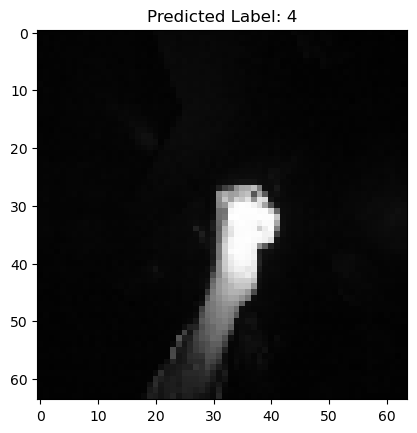

Predicted Label: 4
Actual Label: 4


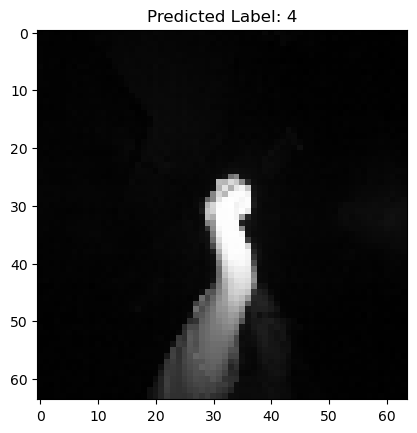

Predicted Label: 9
Actual Label: 9


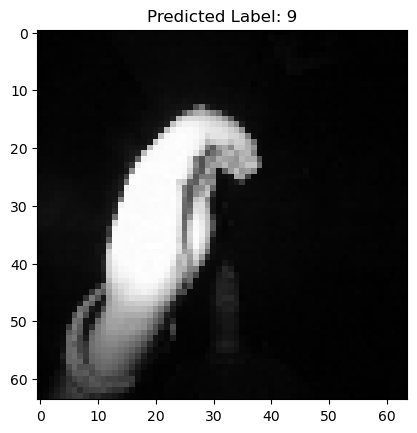

Predicted Label: 8
Actual Label: 8


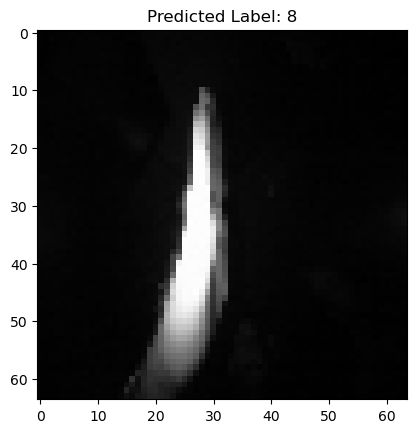

Predicted Label: 2
Actual Label: 2


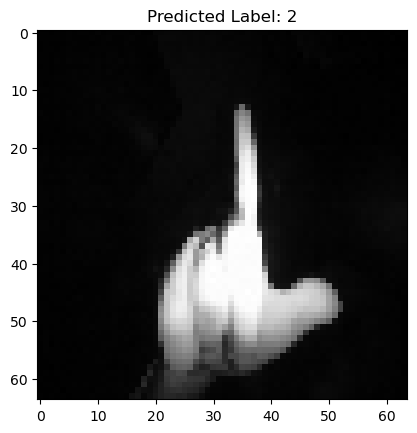

Predicted Label: 4
Actual Label: 4


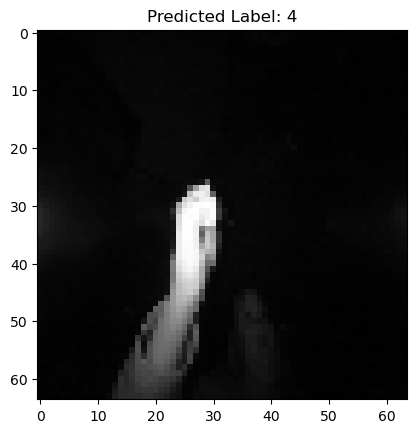

Predicted Label: 0
Actual Label: 0


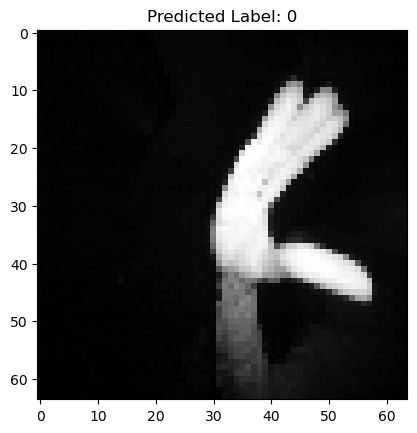

Predicted Label: 9
Actual Label: 9


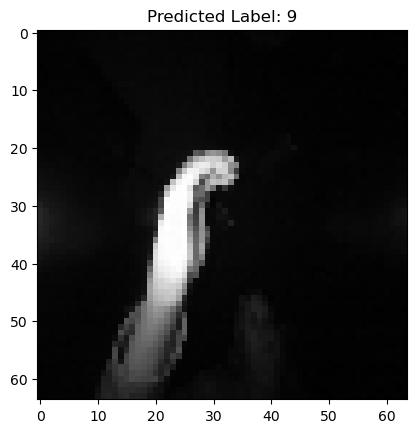

Predicted Label: 0
Actual Label: 0


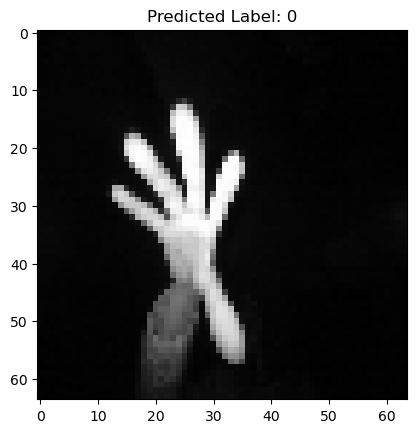

Predicted Label: 7
Actual Label: 7


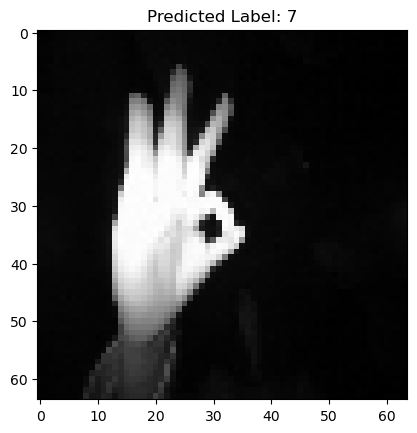

Predicted Label: 2
Actual Label: 2


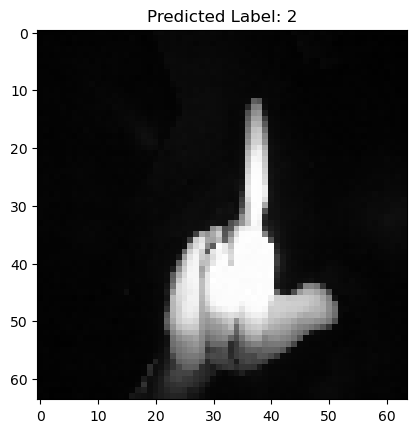

Predicted Label: 1
Actual Label: 1


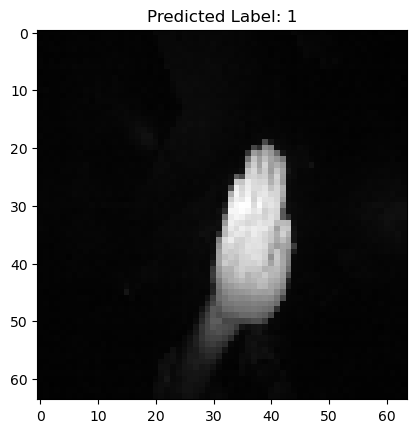

Predicted Label: 1
Actual Label: 1


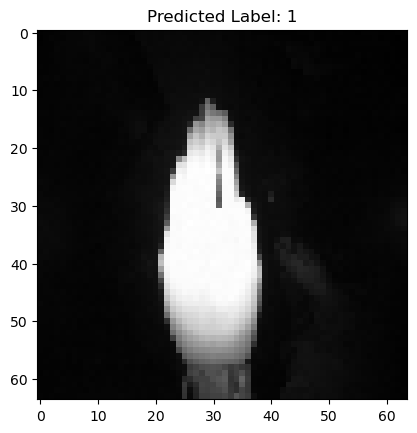

Predicted Label: 7
Actual Label: 7


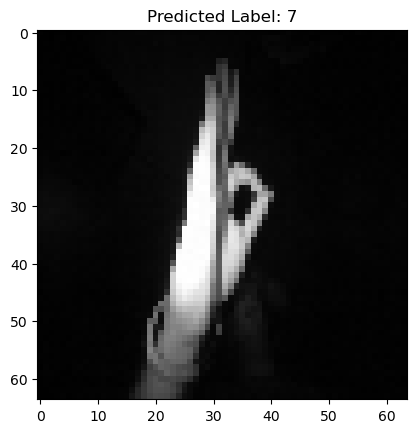

Predicted Label: 9
Actual Label: 9


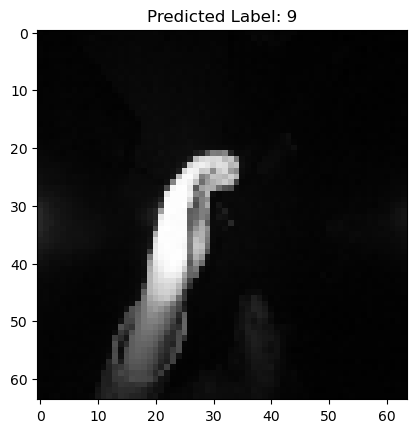

Predicted Label: 6
Actual Label: 6


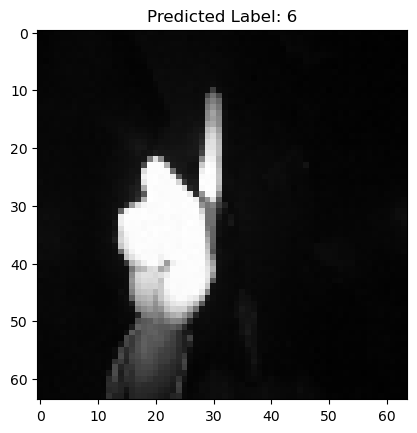

Predicted Label: 0
Actual Label: 0


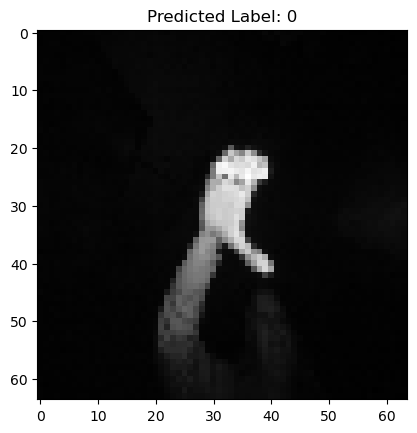

Predicted Label: 2
Actual Label: 2


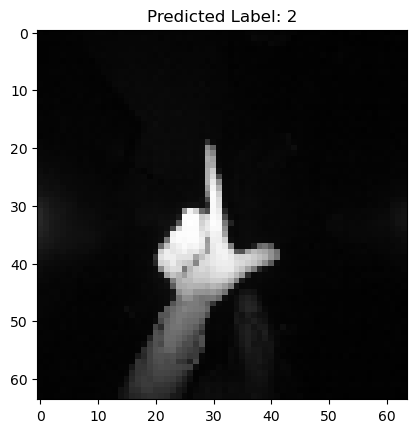

Predicted Label: 9
Actual Label: 9


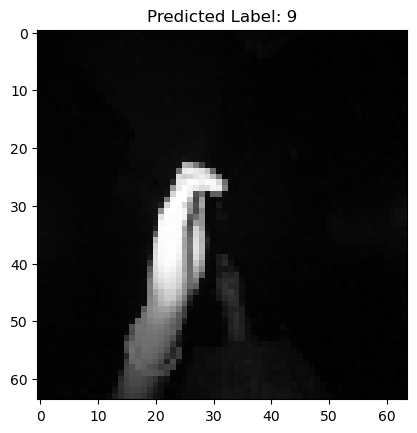

Predicted Label: 5
Actual Label: 5


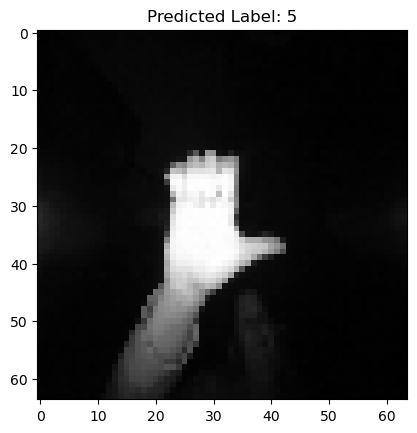

Predicted Label: 3
Actual Label: 3


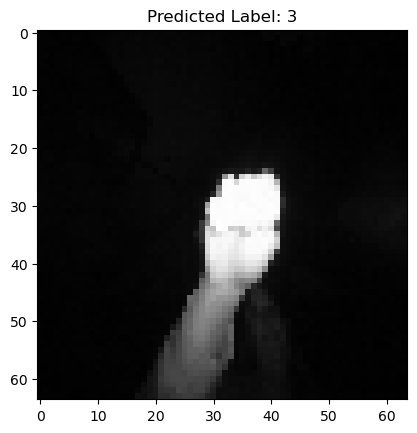

Predicted Label: 1
Actual Label: 1


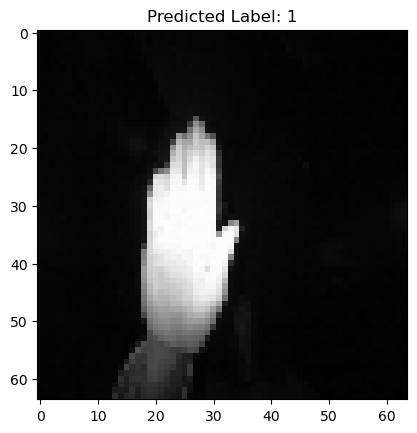

Predicted Label: 4
Actual Label: 4


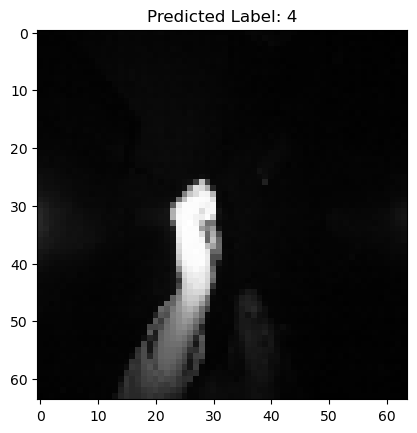

Predicted Label: 0
Actual Label: 0


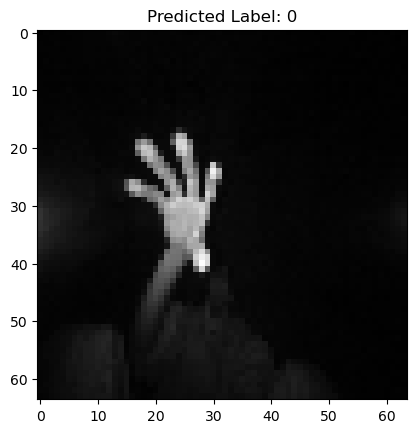

Predicted Label: 7
Actual Label: 7


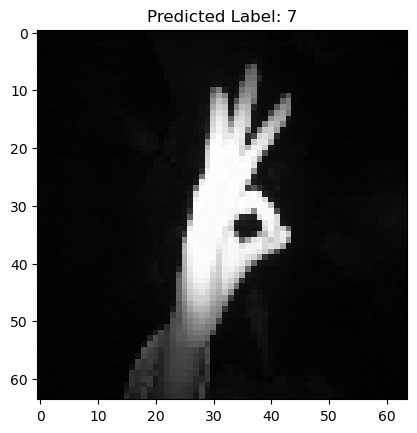

Predicted Label: 9
Actual Label: 9


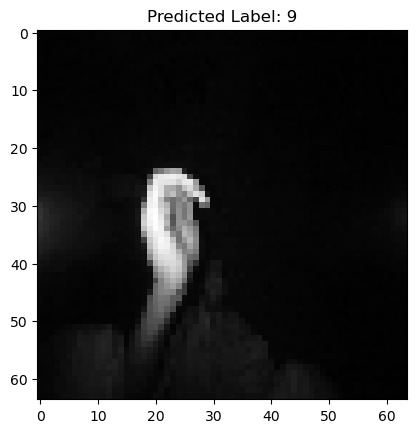

Predicted Label: 5
Actual Label: 5


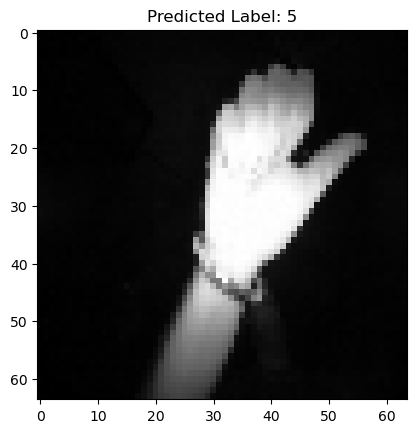

Predicted Label: 9
Actual Label: 9


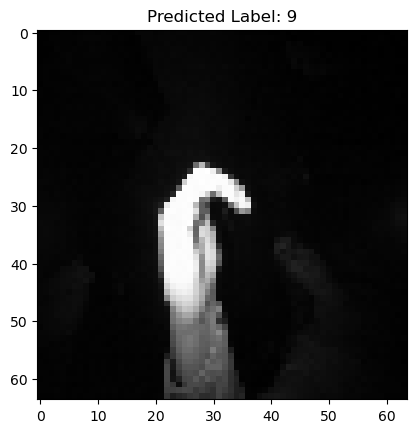

Predicted Label: 6
Actual Label: 6


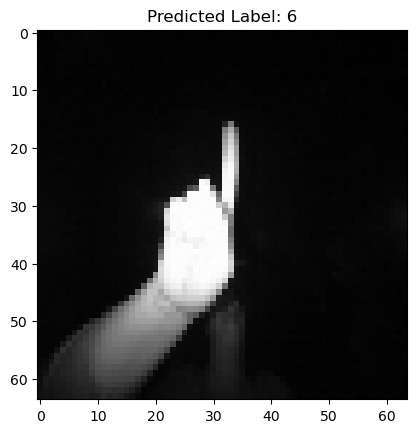

Predicted Label: 4
Actual Label: 4


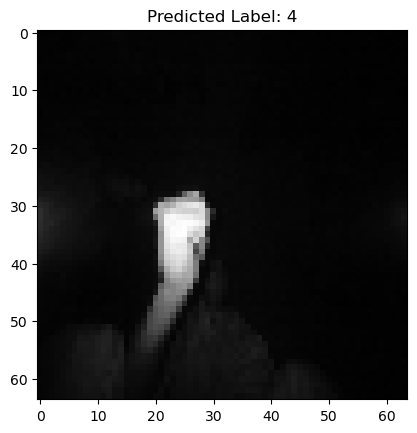

Predicted Label: 2
Actual Label: 2


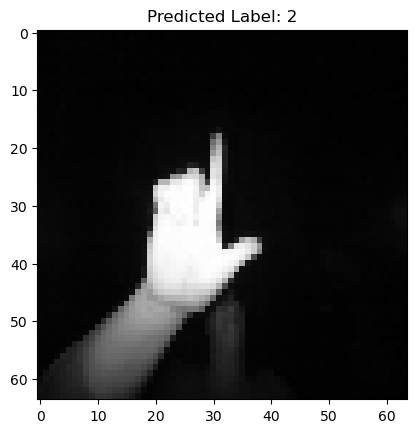

Predicted Label: 2
Actual Label: 2


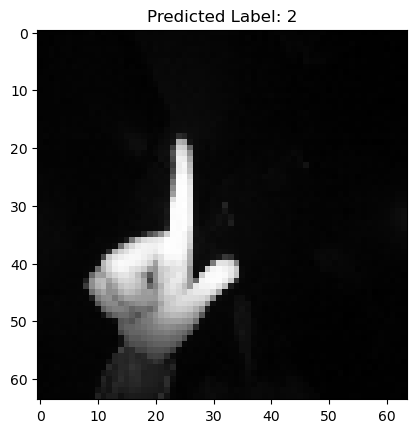

Predicted Label: 4
Actual Label: 4


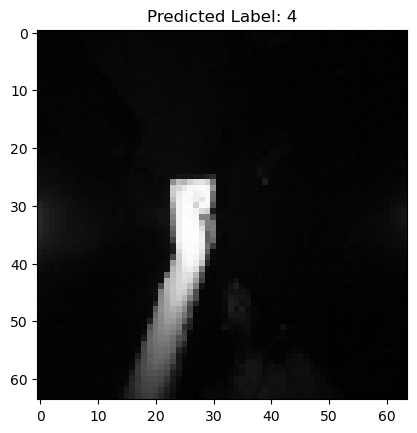

Predicted Label: 0
Actual Label: 0


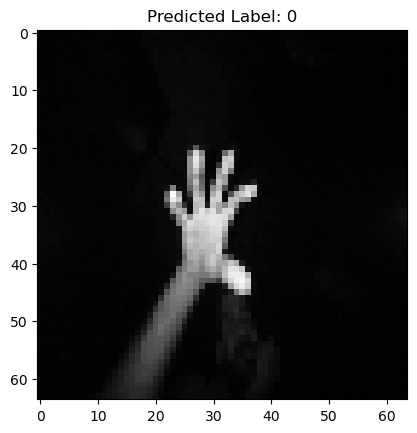

Predicted Label: 1
Actual Label: 1


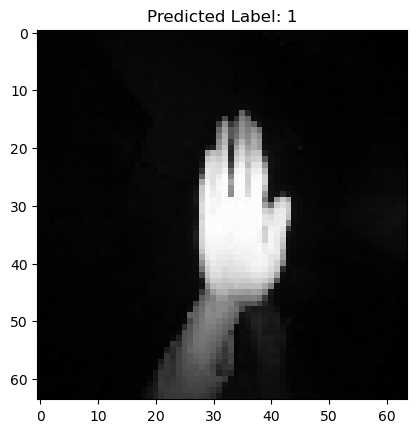

Predicted Label: 5
Actual Label: 5


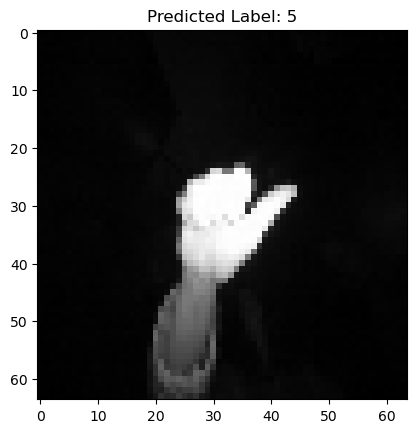

Predicted Label: 5
Actual Label: 5


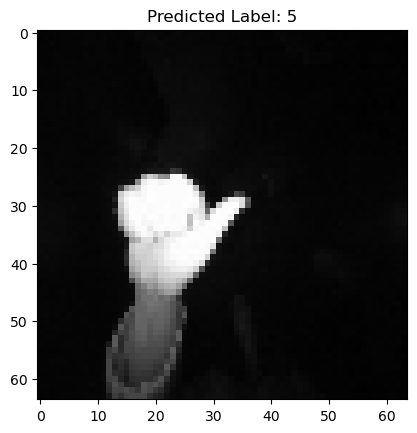

Predicted Label: 7
Actual Label: 7


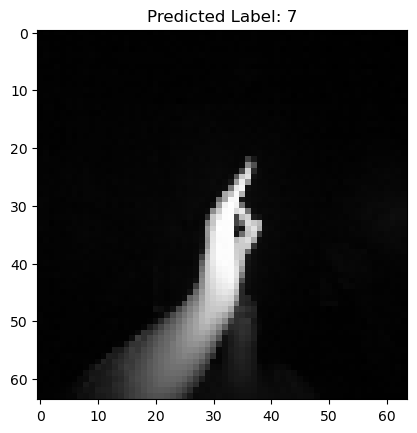

Predicted Label: 2
Actual Label: 2


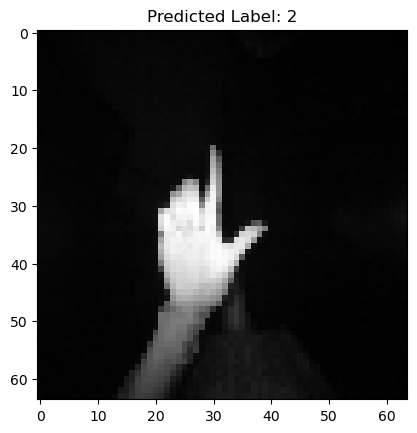

Predicted Label: 9
Actual Label: 9


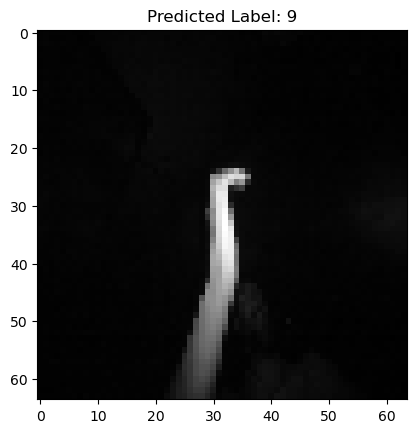

Predicted Label: 8
Actual Label: 8


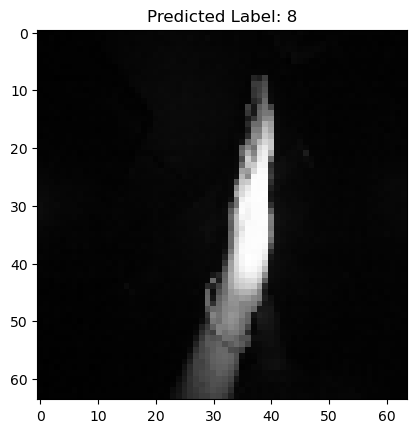

Predicted Label: 2
Actual Label: 2


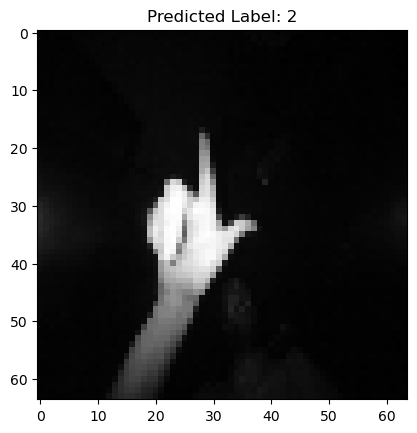

Predicted Label: 0
Actual Label: 0


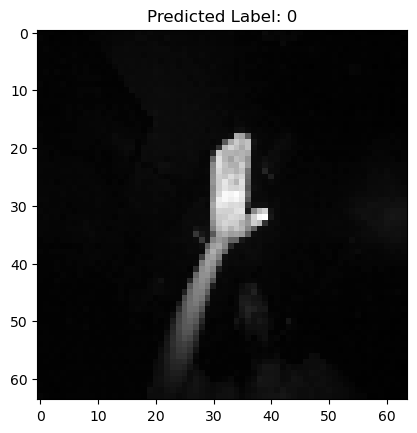

Predicted Label: 7
Actual Label: 7


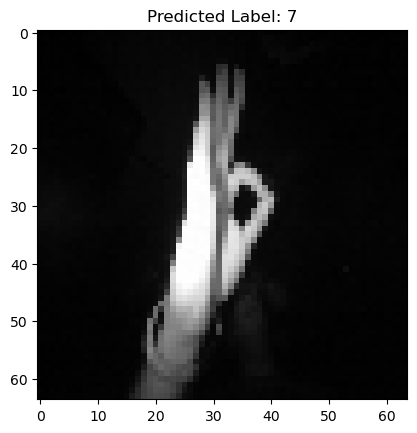

Predicted Label: 3
Actual Label: 3


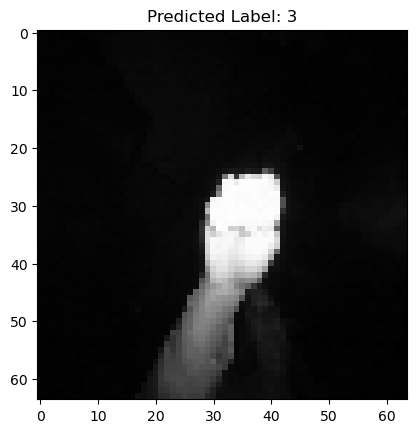

Predicted Label: 7
Actual Label: 7


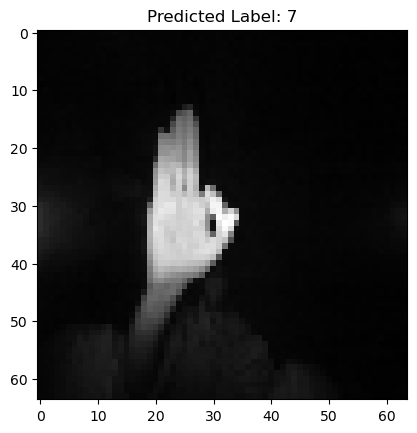

Predicted Label: 2
Actual Label: 2


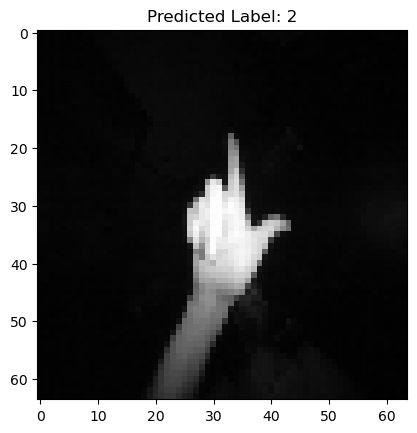

Predicted Label: 8
Actual Label: 8


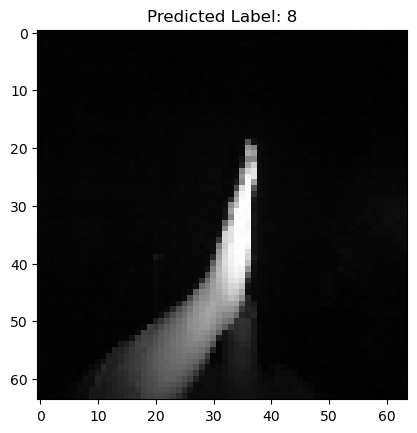

Predicted Label: 8
Actual Label: 8


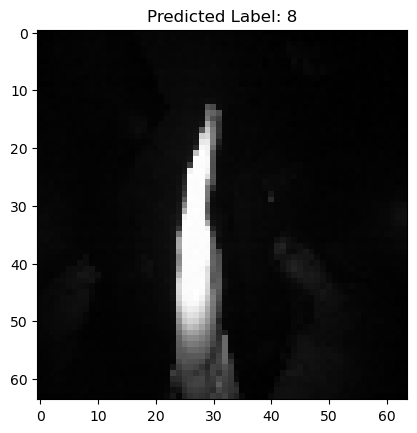

Predicted Label: 2
Actual Label: 2


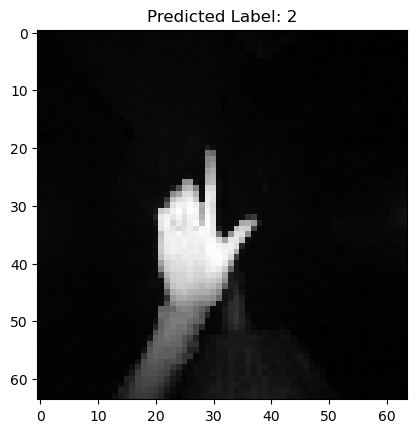

In [87]:
# Make predictions
predictions = model.predict(test_images)

i = 30
for i in range(60):
    # Show the prediction for the first image
    print(f"Predicted Label: {np.argmax(predictions[i])}")
    print(f"Actual Label: {test_labels[i]}")

# Show the first image and its predicted label
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted Label: {np.argmax(predictions[i])}")
    plt.show()


In [88]:
# Save the model
import joblib 

joblib.dump(model, 'gesture_recognition_model.pkl')
# Load the model
loaded_model = joblib.load('gesture_recognition_model.pkl')
# Evaluate the loaded model
loaded_model.evaluate(test_images, test_labels)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0012  


[0.0014009432634338737, 0.9995000958442688]

In [92]:
def predict_hand_gesture(model, image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"❌ Image not found at: {image_path}")

    # Resize to 64x64
    img = cv2.resize(img, (64, 64))

    # Normalize pixel values
    img = img / 255.0

    # Reshape to match training input shape: (1, 64, 64, 1)
    img = img.reshape(1, 64, 64, 1)

    # Predict
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    gesture_names = ['Palm 01', 'I 02', 'Fist 03', 'Fist Moved 04', 'Thumb 05', 
                     'Index 06', 'Ok 07', 'Palm Moved 08', 'C 09', 'Down 10']

    # Visualize
    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {gesture_names[predicted_class-1]}")
    plt.axis("off")
    plt.show()

    print(f"✅ Predicted class: {predicted_class} ({gesture_names[predicted_class]})")
    print(f"Confidence scores: {prediction[0]}")
    return predicted_class, prediction[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


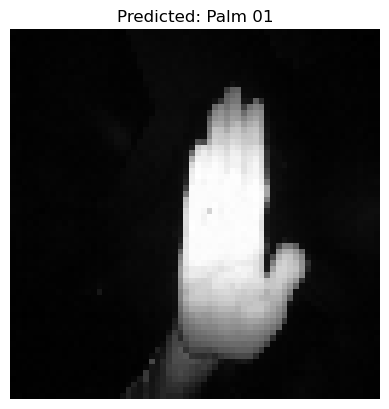

✅ Predicted class: 1 (I 02)
Confidence scores: [1.4891541e-12 1.0000000e+00 9.3356739e-11 7.5684239e-19 1.1009512e-11
 5.5574101e-18 1.9676023e-14 1.8080578e-18 5.4145007e-20 1.0174087e-28]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


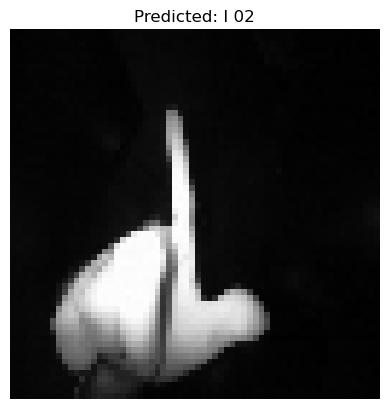

✅ Predicted class: 2 (Fist 03)
Confidence scores: [6.4158616e-21 6.4695072e-15 9.9338454e-01 6.6136946e-03 9.0079712e-13
 1.1346510e-20 2.6117435e-12 5.5938134e-22 1.5078200e-13 1.7915911e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


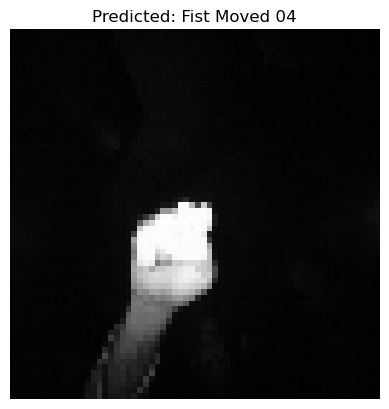

✅ Predicted class: 4 (Thumb 05)
Confidence scores: [2.5233520e-17 6.1791496e-08 6.4059580e-10 5.9731323e-03 9.9402362e-01
 3.3663425e-09 3.6414639e-11 3.2230109e-06 1.5495274e-20 2.6973303e-15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


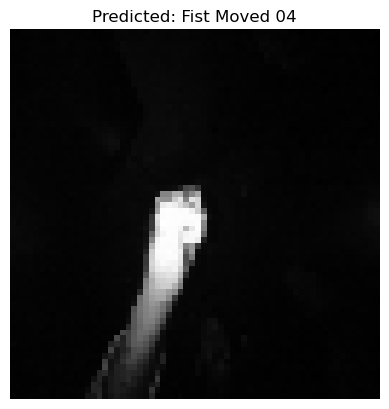

✅ Predicted class: 4 (Thumb 05)
Confidence scores: [3.4805051e-11 2.9900502e-10 1.1786281e-14 8.8749755e-07 9.9999440e-01
 3.9845630e-11 9.7181076e-11 4.6748369e-06 1.2294045e-15 4.9554978e-09]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


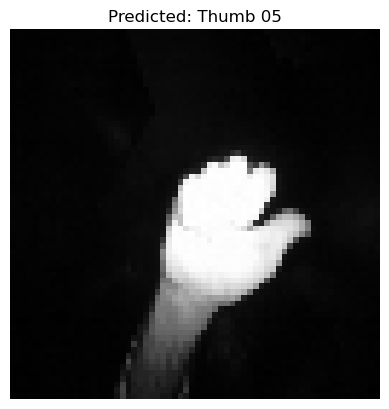

✅ Predicted class: 5 (Index 06)
Confidence scores: [7.2974576e-30 9.5500571e-13 8.5355689e-10 2.7795490e-09 7.5981214e-22
 1.0000000e+00 2.2088987e-11 4.8039329e-12 1.7112292e-31 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


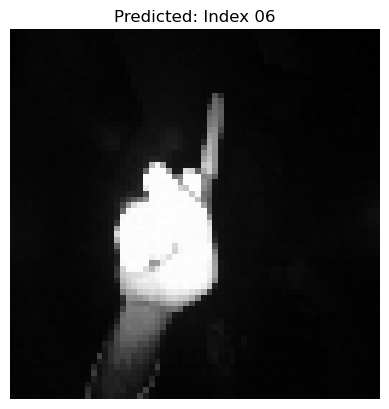

✅ Predicted class: 6 (Ok 07)
Confidence scores: [2.6530689e-19 1.3641017e-09 4.7384344e-07 7.6613986e-09 5.2020866e-13
 4.3199511e-09 9.9999952e-01 5.9980874e-11 5.3525425e-19 3.8537741e-13]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


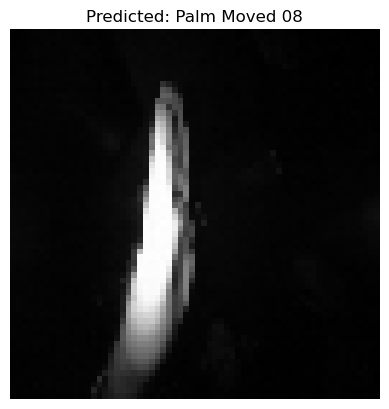

✅ Predicted class: 8 (C 09)
Confidence scores: [2.55133591e-06 1.03861064e-04 2.60616577e-08 6.24901759e-06
 1.22250576e-09 1.42052169e-13 1.66874781e-08 3.31456135e-06
 9.99884009e-01 6.58488659e-08]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


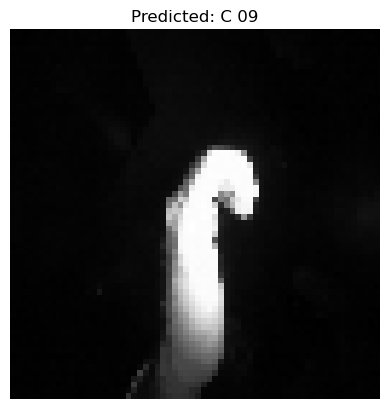

✅ Predicted class: 9 (Down 10)
Confidence scores: [1.73514782e-18 8.09731502e-25 1.01034455e-24 1.20083586e-15
 6.51389942e-10 1.25767729e-24 1.04021063e-11 1.41923132e-14
 4.26861951e-22 1.00000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


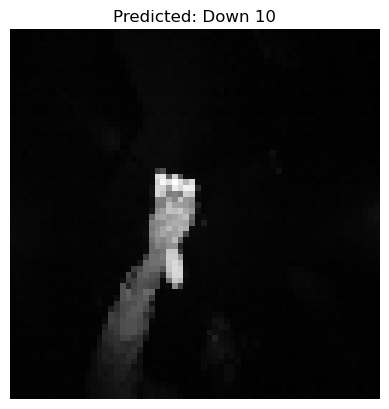

✅ Predicted class: 0 (Palm 01)
Confidence scores: [9.9994695e-01 8.2202786e-11 7.4520923e-13 2.1433799e-09 3.6218022e-05
 6.0694016e-10 8.5906584e-07 7.3361507e-06 2.5512625e-08 8.5856254e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


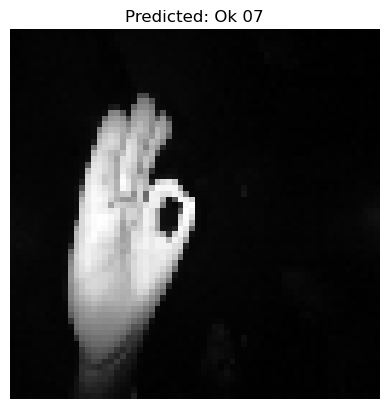

✅ Predicted class: 7 (Palm Moved 08)
Confidence scores: [2.1503086e-11 5.4966733e-07 9.8493308e-21 1.0302096e-10 4.5428331e-12
 2.1907680e-14 1.6800736e-13 9.9999940e-01 3.1265930e-18 3.3473925e-17]


(7,
 array([2.1503086e-11, 5.4966733e-07, 9.8493308e-21, 1.0302096e-10,
        4.5428331e-12, 2.1907680e-14, 1.6800736e-13, 9.9999940e-01,
        3.1265930e-18, 3.3473925e-17], dtype=float32))

In [ ]:
predict_hand_gesture(model, "test_images/0.png")
predict_hand_gesture(model, "test_images/1.png")
predict_hand_gesture(model, "test_images/2.png")
predict_hand_gesture(model, "test_images/3.png")
predict_hand_gesture(model, "test_images/4.png")
predict_hand_gesture(model, "test_images/5.png")
predict_hand_gesture(model, "test_images/6.png")
predict_hand_gesture(model, "test_images/7.png")
predict_hand_gesture(model, "test_images/8.png")
predict_hand_gesture(model, "test_images/9.png")

